# Chapter 6: Linear Model Selection and Regularization

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')

## Importing the dataset

In [2]:
dataset = pd.read_csv('data/Hitters.csv', na_values='NA').dropna().reset_index(drop=True)

In [3]:
dataset.shape

(263, 21)

In [4]:
dataset.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
1,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
2,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
3,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
4,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [5]:
dataset = pd.get_dummies(dataset.iloc[:, 1:], drop_first=True)

In [6]:
dataset.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [7]:
X = dataset.loc[:, ~dataset.columns.isin(['Salary'])]

In [8]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [9]:
y = dataset.loc[:, dataset.columns.isin(['Salary'])]

In [10]:
y.head()

,Salary
0,475.0
1,480.0
2,500.0
3,91.5
4,750.0


Load the training and test set which are as same as those in the book

In [11]:
X_train = pd.read_csv('data/Hitters_X_train.csv', index_col=0)
y_train = pd.read_csv('data/Hitters_y_train.csv', index_col=0)
X_test = pd.read_csv('data/Hitters_X_test.csv', index_col=0)
y_test = pd.read_csv('data/Hitters_y_test.csv', index_col=0)

## Lab 1: Subset Selection Methods
### Best Subset Selection

In [12]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [13]:
efs = ExhaustiveFeatureSelector(LinearRegression(),
                                min_features=1,
                                max_features=6,
                                scoring='neg_mean_squared_error',
                                print_progress=True,
                                cv=None)

In [14]:
efs.fit(X, y)

Features: 3000/43795IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 8178/43795IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Features: 19101/43795IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Notebo

In [15]:
efs.best_feature_names_

('AtBat', 'Hits', 'Walks', 'CRBI', 'PutOuts', 'Division_W')

In [16]:
X_subset = pd.DataFrame(efs.transform(X), columns=efs.best_feature_names_)

In [17]:
X_subset.head()

,AtBat,Hits,Walks,CRBI,PutOuts,Division_W
0,315,81,39,414,632,1
1,479,130,76,266,880,1
2,496,141,37,838,200,0
3,321,87,30,46,805,0
4,594,169,35,336,282,1


In [18]:
regression = LinearRegression()
regression.fit(X_subset, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regression.coef_

array([[  -1.86858923,    7.60439763,    3.69764677,    0.64301694,
           0.26430761, -122.95153377]])

In [20]:
regression.intercept_

array([91.51179812])

### Forward Stepwise Selection

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [22]:
sfs = SequentialFeatureSelector(LinearRegression(),
                                k_features=7,
                                forward=True,
                                floating=False,
                                scoring='neg_mean_squared_error',
                                cv=None)

In [23]:
sfs.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=None,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=7, n_jobs=1,
                          pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=0)

In [24]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)",[-137565.32036137575],-137565,"(CRBI,)",NaN,0,NaN
2,"(1, 11)",[-116526.84368963055],-116527,"(Hits, CRBI)",NaN,0,NaN
3,"(1, 11, 13)",[-111214.0564861875],-111214,"(Hits, CRBI, PutOuts)",NaN,0,NaN
4,"(1, 11, 13, 17)",[-106353.04872933947],-106353,"(Hits, CRBI, PutOuts, Division_W)",NaN,0,NaN
5,"(0, 1, 11, 13, 17)",[-103231.5567757093],-103232,"(AtBat, Hits, CRBI, PutOuts, Division_W)",NaN,0,NaN
6,"(0, 1, 5, 11, 13, 17)",[-99600.39516195896],-99600.4,"(AtBat, Hits, Walks, CRBI, PutOuts, Division_W)",NaN,0,NaN
7,"(0, 1, 5, 11, 12, 13, 17)",[-98685.23605214393],-98685.2,"(AtBat, Hits, Walks, CRBI, CWalks, PutOuts, Di...",NaN,0,NaN


### Backward Stepwise Selection

In [25]:
sbs = SequentialFeatureSelector(LinearRegression(),
                                k_features=7,
                                forward=False,
                                floating=False,
                                scoring='neg_mean_squared_error',
                                cv=None)

In [26]:
sbs.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=None,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=False, k_features=7, n_jobs=1,
                          pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=0)

In [27]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[-92017.86901772919],-92017.9,"(AtBat, Hits, HmRun, Runs, RBI, Walks, Years, ...",NaN,0,NaN
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...",[-92022.19527998423],-92022.2,"(AtBat, Hits, HmRun, Runs, RBI, Walks, Years, ...",NaN,0,NaN
17,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",[-92051.12835223945],-92051.1,"(AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...",NaN,0,NaN
16,"(0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",[-92088.88772977113],-92088.9,"(AtBat, Hits, HmRun, Runs, RBI, Walks, CAtBat,...",NaN,0,NaN
15,"(0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",[-92148.96332783562],-92149,"(AtBat, Hits, HmRun, Runs, Walks, CAtBat, CHit...",NaN,0,NaN
14,"(0, 1, 2, 3, 5, 7, 10, 11, 12, 13, 14, 15, 16,...",[-92200.22963038784],-92200.2,"(AtBat, Hits, HmRun, Runs, Walks, CAtBat, CRun...",NaN,0,NaN
13,"(0, 1, 3, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17)",[-92354.17428989148],-92354.2,"(AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...",NaN,0,NaN
12,"(0, 1, 3, 5, 7, 10, 11, 12, 13, 14, 16, 17)",[-92521.79611890587],-92521.8,"(AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...",NaN,0,NaN
11,"(0, 1, 5, 7, 10, 11, 12, 13, 14, 16, 17)",[-92727.54772410596],-92727.5,"(AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",NaN,0,NaN
10,"(0, 1, 5, 7, 10, 11, 12, 13, 14, 17)",[-93157.4202955878],-93157.4,"(AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",NaN,0,NaN


### Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [28]:
sfs_cv = SequentialFeatureSelector(LinearRegression(),
                                   k_features=11,
                                   forward=True,
                                   floating=False,
                                   scoring='neg_mean_squared_error',
                                   cv=10)

In [29]:
sfs_cv.fit(X, y)

SequentialFeatureSelector(clone_estimator=True, cv=10,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=11, n_jobs=1,
                          pre_dispatch='2*n_jobs',
                          scoring='neg_mean_squared_error', verbose=0)

In [30]:
sfs_cv.k_feature_names_

('AtBat',
 'Hits',
 'Walks',
 'Years',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'League_N',
 'Division_W',
 'NewLeague_N')

## Lab 2: Ridge Regression and the Lasso

In [40]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Ridge Regression

In [33]:
alphas = 10 ** np.linspace(10, -2, 100)

In [34]:
coefficients = []
ridge = Ridge()

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(scale(X), y)
    coefficients.append(ridge.coef_.ravel())

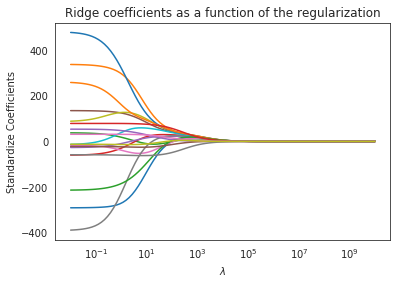

In [35]:
ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('Standardize Coefficients')
plt.title('Ridge coefficients as a function of the regularization');

### Compute the regularization path using RidgeCV

In [36]:
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=10)

In [37]:
ridge_cv.fit(scaler.transform(X_train), y_train)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [38]:
ridge_cv.alpha_

100.0

In [41]:
mean_squared_error(y_test, ridge_cv.predict(scaler.transform(X_test)))

96417.8136429078

In [42]:
pd.Series(ridge_cv.coef_.flatten(), index=X.columns)

AtBat           5.559649
Hits           22.893732
HmRun          19.431685
Runs           19.859330
RBI            21.074810
Walks          58.870478
Years          -6.787442
CAtBat         20.752173
CHits          30.645308
CHmRun         13.816343
CRuns          38.037441
CRBI           20.334967
CWalks         24.582540
PutOuts        16.848101
Assists       -46.965887
Errors         57.761412
League_N        6.213095
Division_W     -0.816456
NewLeague_N    11.254522
dtype: float64

### Lasso

In [43]:
lasso = Lasso(max_iter=10000)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_.ravel())

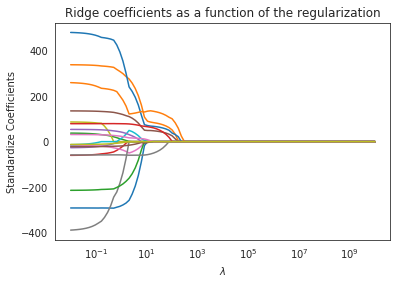

In [44]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('Standardize Coefficients')
plt.title('Ridge coefficients as a function of the regularization');

### Compute the regularization path using LassoCV

In [45]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(scaler.transform(X_train), y_train)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [46]:
lasso_cv.alpha_

30.01382256446427

In [47]:
mean_squared_error(y_test, lasso_cv.predict(scaler.transform(X_test)))

101650.15052295614

In [48]:
pd.Series(lasso_cv.coef_.flatten(), index=X.columns)

AtBat            0.000000
Hits             0.000000
HmRun            2.154219
Runs             0.000000
RBI             30.835560
Walks          104.071528
Years           -0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns          132.858095
CRBI             0.000000
CWalks           0.000000
PutOuts          1.896185
Assists        -51.058752
Errors          76.779641
League_N         0.000000
Division_W       0.000000
NewLeague_N      0.000000
dtype: float64

## Lab 3: PCR and PLS Regression
### Principal Components Regression

In [49]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA

#### PCA on the full dataset

In [50]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [51]:
pca.components_.shape

(19, 19)

In [52]:
print('Variance explained by the principal components')
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Variance explained by the principal components


array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

In [53]:
# 10-fold CV with shuffle
n = len(X_reduced)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

In [54]:
# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * cross_val_score(LinearRegression(), np.ones((n, 1)), y, cv=kfold, scoring='neg_mean_squared_error').mean()
mse.append(score)

In [55]:
# Calculate MSE using CV for principal components, adding one component at the time
for i in np.arange(1, 20):
    score = -1 * cross_val_score(LinearRegression(), X_reduced[:, :i], y, cv=kfold, scoring='neg_mean_squared_error').mean()
    mse.append(score)

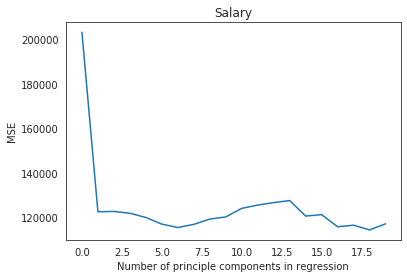

In [56]:
plt.plot(mse)
plt.xlabel('Number of principle components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

#### PCA on the training set

In [57]:
pca2 = PCA()
X_train_reduced = pca2.fit_transform(scaler.transform(X_train))

In [58]:
pca2.components_.shape

(19, 19)

In [59]:
print('Variance explained by the principal components')
np.cumsum(np.round(pca2.explained_variance_ratio_, decimals=4)*100)

Variance explained by the principal components


array([38.89, 60.24, 70.84, 79.06, 84.  , 88.51, 92.61, 95.2 , 96.78,
       97.62, 98.27, 98.88, 99.26, 99.55, 99.77, 99.89, 99.95, 99.98,
       99.98])

In [60]:
# 10-fold CV with shuffle
n = len(X_train_reduced)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

In [61]:
# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * cross_val_score(LinearRegression(), np.ones((n, 1)), y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
mse.append(score)

In [62]:
# Calculate MSE using CV for principal components, adding one component at the time
for i in np.arange(1, 20):
    score = -1 * cross_val_score(LinearRegression(), X_train_reduced[:, :i], y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
    mse.append(score)

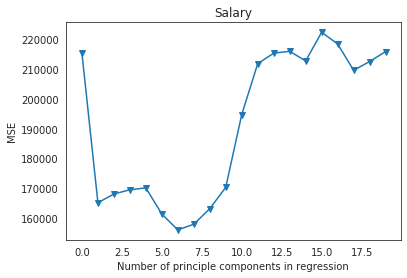

In [63]:
plt.plot(mse, '-v')
plt.xlabel('Number of principle components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

#### Select the best number of components and evaluate on the test set

In [79]:
n_components = 6

In [80]:
X_test_reduced = pca2.transform(scaler.transform(X_test))[:, :n_components]

In [81]:
regressor = LinearRegression()
regressor.fit(X_train_reduced[:, :n_components], y_train)
mean_squared_error(y_test, regressor.predict(X_test_reduced))

96587.9206957096

### Partial Least Squares

In [66]:
from sklearn.cross_decomposition import PLSRegression

#### PLS on the training set

In [67]:
n = len(X_train)

# 10-fold CV, with shuffle
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scaler.transform(X_train), y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
    mse.append(-1 * score)

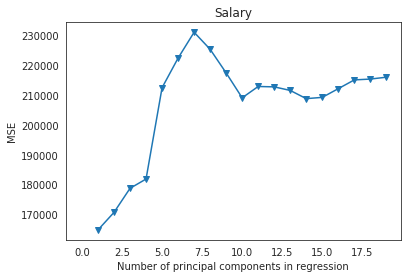

In [68]:
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

#### Select the best number of components and evaluate on the test set

In [82]:
n_components = 1

In [83]:
pls = PLSRegression(n_components=n_components)
pls.fit(scaler.transform(X_train), y_train)

mean_squared_error(y_test, pls.predict(scaler.transform(X_test)))

90201.76318412299